<a href="https://colab.research.google.com/github/AndreiAf02/Data-Balancing-in-ML-DNN/blob/main/Diabetes_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Diabetes Health Indicators - ML Classification with Random Under/Oversampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter



from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
# !pip install pytorch-tabnet

# from pytorch_tabnet.tab_model import TabNetClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Data taken from the UCI Machine Learning repository [here](https://doi.org/10.24432/C53919):

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)



In [4]:
data = cdc_diabetes_health_indicators.data
# data (as pandas dataframes)
X = data.features
y = data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [5]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [6]:
## Scaling the predictive data

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [7]:
data2 = pd.concat([X_scaled, y], axis=1)
data2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714,0
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000,0
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000,0
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286,0
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143,0
253676,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571,1
253677,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857,0
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000,0


In [8]:
y.value_counts()

,count
Diabetes_binary,
0,218334
1,35346


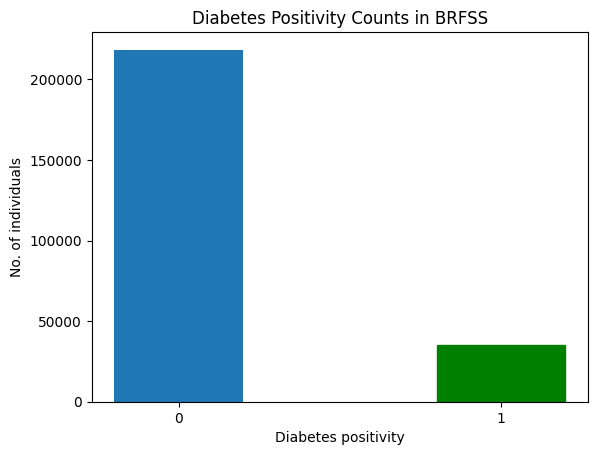

In [9]:
barlist = plt.bar([str(0),str(1)], y.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS")
plt.show()

# Full Dataset:

In [10]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143
253676,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571
253677,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000


In [11]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


## DNN Classification Algorithm:

In [12]:
def create_dnn_model(input_shape):
  model = models.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no diabetes)
    ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

  return model



def train_and_evaluate_ml(model, X_train, X_test, y_train, y_test, domain):

    # time_start = perf_counter()

    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)

    fpr = conf_matrix[0][1]/(conf_matrix[0][0]+conf_matrix[0][1])
    tnr = 1-fpr

    fnr = conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[1][1])
    tpr = 1 - fnr
    print('FPR', fpr, 'TPR:', tpr, 'FNR:', fnr, 'TNR:', tnr)

    # conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # ## To deactivate after!!! ----------------------------------------
    # ##### Plot ROC curve and Confusion Matrix side by side
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # # ROC Curve
    # ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    # ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    # ax1.set_xlabel('False Positive Rate')
    # ax1.set_ylabel('True Positive Rate')
    # ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    # ax1.legend(loc='lower right')
    # ax1.grid()

    # # Confusion Matrix
    # conf_disp.plot(ax=ax2, cmap='Blues')
    # ax2.set_title('Confusion Matrix')
    # plt.tight_layout()
    # plt.show()
    ## To deactivate after!!! ----------------------------------------

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")

    return fpr, tnr, fnr, tpr


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [14]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (202944, 21)
y_train: (202944, 1)
X_test: (50736, 21)
y_test: (50736, 1)


In [15]:
## Establishing the Under/Oversampling values and imbalance ratio:

undersample_size = min(data_train['Diabetes_binary'].value_counts())
oversample_size = max(data_train['Diabetes_binary'].value_counts())


data_majority = data_train[data_train['Diabetes_binary']==0]
data_minority = data_train[data_train['Diabetes_binary']==1]

print(undersample_size)
print(oversample_size)

28135
174809


## Imbalanced (Original) data:

In [16]:
times = 1

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    # X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)
    model_source = create_dnn_model(X_train.shape[1])
    result_imbalanced = train_and_evaluate_ml(model_source, X_train, X_test, y_train, y_test, "Source")
    # result_TL_imbalanced = Transductive_TL(model_source, X_T_full, y_T_full, "Target")

    FPR.append(result_imbalanced[0])
    TNR.append(result_imbalanced[1])
    FNR.append(result_imbalanced[2])
    TPR.append(result_imbalanced[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']
# print(ParamFit)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - AUC: 0.7750 - loss: 0.3451 - val_AUC: 0.8223 - val_loss: 0.3153
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - AUC: 0.8190 - loss: 0.3191 - val_AUC: 0.8237 - val_loss: 0.3153
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - AUC: 0.8229 - loss: 0.3180 - val_AUC: 0.8251 - val_loss: 0.3191
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - AUC: 0.8252 - loss: 0.3126 - val_AUC: 0.8255 - val_loss: 0.3122
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.8293 - loss: 0.3124 - val_AUC: 0.8251 - val_loss: 0.3129
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - AUC: 0.8261 - loss: 0.3132 - val_AUC: 0.8265 - val_loss: 0.3118
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - AUC: 0.8285 - loss: 0.3126 - val_AUC: 0.8267 - val_loss: 0.3115
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - AUC: 0.8275 - loss: 0.3148 - val_AUC: 0.8258 - val_loss: 0.3140
Epoch 9/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 1

In [17]:
print(ParamFit)
# ParamFit.to_csv('ML_Imbalanced.csv')

        FPR       TPR       FNR       TNR
0  0.010706  0.113576  0.886424  0.989294


# Random Undersampling (RUS) to balance Dataset:

## SRS Sample without Replacement:

In [21]:
times = 50

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    data_maj_rus = data_majority.sample(n=undersample_size, replace=False)
    data_SRS_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRS_train = data_SRS_RUS.iloc[:, :21]
    y_SRS_train = data_SRS_RUS.iloc[:, 21]
    model_SRS = create_dnn_model(X_SRS_train.shape[1])
    result_SRS = train_and_evaluate_ml(model_SRS, X_SRS_train, X_test, y_SRS_train, y_test, "Source")

    FPR.append(result_SRS[0])
    TNR.append(result_SRS[1])
    FNR.append(result_SRS[2])
    TPR.append(result_SRS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']
# print(ParamFit)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7689 - loss: 0.5453 - val_AUC: 0.0000e+00 - val_loss: 0.6243
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8141 - loss: 0.5027 - val_AUC: 0.0000e+00 - val_loss: 0.8425
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8179 - loss: 0.4995 - val_AUC: 0.0000e+00 - val_loss: 0.7054
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8209 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.6561
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.8025
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8218 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.9140
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8220 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.6805
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8231 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6776
Epoch 9/

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7710 - loss: 0.5426 - val_AUC: 0.0000e+00 - val_loss: 0.6850
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8124 - loss: 0.5041 - val_AUC: 0.0000e+00 - val_loss: 0.5406
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8186 - loss: 0.4981 - val_AUC: 0.0000e+00 - val_loss: 0.7284
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8212 - loss: 0.4977 - val_AUC: 0.0000e+00 - val_loss: 0.6808
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.7081
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8201 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.5655
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8231 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.7511
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8243 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.6248
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7765 - loss: 0.5471 - val_AUC: 0.0000e+00 - val_loss: 0.8509
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8134 - loss: 0.5039 - val_AUC: 0.0000e+00 - val_loss: 0.8799
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8153 - loss: 0.5013 - val_AUC: 0.0000e+00 - val_loss: 0.7296
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8206 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.7094
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8210 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.7050
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8214 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.6044
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8213 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.7440
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8255 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.8170
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7673 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.7816
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8175 - loss: 0.4997 - val_AUC: 0.0000e+00 - val_loss: 0.6572
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8242 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6600
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.6742
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8204 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.7246
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8253 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6054
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8248 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.6639
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8249 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.5823
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7719 - loss: 0.5430 - val_AUC: 0.0000e+00 - val_loss: 0.7664
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8142 - loss: 0.5025 - val_AUC: 0.0000e+00 - val_loss: 0.6837
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8201 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.6085
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8233 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7484
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8229 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7501
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8267 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.7099
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8280 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.5976
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8278 - loss: 0.4862 - val_AUC: 0.0000e+00 - val_loss: 0.7380
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7716 - loss: 0.5458 - val_AUC: 0.0000e+00 - val_loss: 0.8877
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8140 - loss: 0.5044 - val_AUC: 0.0000e+00 - val_loss: 0.6942
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8172 - loss: 0.4997 - val_AUC: 0.0000e+00 - val_loss: 0.6748
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.8045
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.8161
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8290 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.7191
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8284 - loss: 0.4865 - val_AUC: 0.0000e+00 - val_loss: 0.6358
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.5045
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7713 - loss: 0.5416 - val_AUC: 0.0000e+00 - val_loss: 0.7032
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8146 - loss: 0.5028 - val_AUC: 0.0000e+00 - val_loss: 0.6628
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8222 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.7171
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8242 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.7165
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6297
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8263 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.7382
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6020
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8266 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6208
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7814 - loss: 0.5368 - val_AUC: 0.0000e+00 - val_loss: 0.6522
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8169 - loss: 0.4980 - val_AUC: 0.0000e+00 - val_loss: 0.6332
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8202 - loss: 0.4961 - val_AUC: 0.0000e+00 - val_loss: 0.6986
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8196 - loss: 0.4971 - val_AUC: 0.0000e+00 - val_loss: 0.6532
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8195 - loss: 0.4975 - val_AUC: 0.0000e+00 - val_loss: 0.6708
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8275 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.7804
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8228 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6701
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8255 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6785
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7816 - loss: 0.5373 - val_AUC: 0.0000e+00 - val_loss: 0.6761
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8208 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.7668
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8213 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.6902
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8282 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.5917
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8265 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.6276
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.8260
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8289 - loss: 0.4853 - val_AUC: 0.0000e+00 - val_loss: 0.6839
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8301 - loss: 0.4849 - val_AUC: 0.0000e+00 - val_loss: 0.5646
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7809 - loss: 0.5383 - val_AUC: 0.0000e+00 - val_loss: 0.7720
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8186 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.6186
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8210 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.7271
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.6946
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8281 - loss: 0.4872 - val_AUC: 0.0000e+00 - val_loss: 0.6689
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8274 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.6328
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.6828
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4865 - val_AUC: 0.0000e+00 - val_loss: 0.6321
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7757 - loss: 0.5426 - val_AUC: 0.0000e+00 - val_loss: 0.6482
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8181 - loss: 0.4989 - val_AUC: 0.0000e+00 - val_loss: 0.7505
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8183 - loss: 0.4969 - val_AUC: 0.0000e+00 - val_loss: 0.6806
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8229 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.7126
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8237 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6933
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8261 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7319
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8220 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.7199
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8272 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.7596
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7813 - loss: 0.5388 - val_AUC: 0.0000e+00 - val_loss: 0.7143
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8139 - loss: 0.5029 - val_AUC: 0.0000e+00 - val_loss: 0.6817
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8187 - loss: 0.4978 - val_AUC: 0.0000e+00 - val_loss: 0.6855
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8242 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.5639
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8213 - loss: 0.4953 - val_AUC: 0.0000e+00 - val_loss: 0.6068
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.5930
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8280 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.7298
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8279 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.6999
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7729 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.7456
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8159 - loss: 0.5026 - val_AUC: 0.0000e+00 - val_loss: 0.6745
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8172 - loss: 0.5010 - val_AUC: 0.0000e+00 - val_loss: 0.6160
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8206 - loss: 0.4964 - val_AUC: 0.0000e+00 - val_loss: 0.7791
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8179 - loss: 0.4985 - val_AUC: 0.0000e+00 - val_loss: 0.7182
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8209 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.5956
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8271 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6664
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.7155
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7771 - loss: 0.5422 - val_AUC: 0.0000e+00 - val_loss: 0.6521
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8176 - loss: 0.5005 - val_AUC: 0.0000e+00 - val_loss: 0.6785
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8212 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.6270
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8210 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.5651
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8229 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7309
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8224 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.7075
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8247 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6826
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8272 - loss: 0.4862 - val_AUC: 0.0000e+00 - val_loss: 0.7878
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7621 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.6875
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8173 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.6165
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8209 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6815
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8203 - loss: 0.4962 - val_AUC: 0.0000e+00 - val_loss: 0.6418
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.7264
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8241 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.6881
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8249 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6203
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8252 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6646
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7747 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.7605
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8165 - loss: 0.5012 - val_AUC: 0.0000e+00 - val_loss: 0.5989
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8255 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.6397
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8298 - loss: 0.4854 - val_AUC: 0.0000e+00 - val_loss: 0.6808
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8277 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.7024
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8286 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.8391
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8296 - loss: 0.4864 - val_AUC: 0.0000e+00 - val_loss: 0.7706
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.5986
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7764 - loss: 0.5411 - val_AUC: 0.0000e+00 - val_loss: 0.7962
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8144 - loss: 0.5029 - val_AUC: 0.0000e+00 - val_loss: 0.7480
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8173 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.8084
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.7769
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8241 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.6774
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8279 - loss: 0.4849 - val_AUC: 0.0000e+00 - val_loss: 0.7001
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8255 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.7078
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8263 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6707
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7754 - loss: 0.5406 - val_AUC: 0.0000e+00 - val_loss: 0.9013
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8160 - loss: 0.5018 - val_AUC: 0.0000e+00 - val_loss: 0.7247
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6202
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8192 - loss: 0.4987 - val_AUC: 0.0000e+00 - val_loss: 0.6851
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.6663
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8278 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.6639
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8263 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.7458
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8276 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.5613
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7804 - loss: 0.5366 - val_AUC: 0.0000e+00 - val_loss: 0.8725
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8207 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.5696
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8190 - loss: 0.4981 - val_AUC: 0.0000e+00 - val_loss: 0.7330
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.6400
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6909
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6773
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8251 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.7995
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8278 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.7179
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7723 - loss: 0.5458 - val_AUC: 0.0000e+00 - val_loss: 0.5993
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8145 - loss: 0.5030 - val_AUC: 0.0000e+00 - val_loss: 0.7021
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8183 - loss: 0.4994 - val_AUC: 0.0000e+00 - val_loss: 0.6982
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8204 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.7000
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8209 - loss: 0.4964 - val_AUC: 0.0000e+00 - val_loss: 0.6708
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.6264
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8204 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.7793
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8276 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.7448
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7825 - loss: 0.5407 - val_AUC: 0.0000e+00 - val_loss: 0.6432
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8144 - loss: 0.5028 - val_AUC: 0.0000e+00 - val_loss: 0.5460
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.7234
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8234 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.6271
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8227 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.7291
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.5966
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.7405
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8302 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.6914
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7786 - loss: 0.5416 - val_AUC: 0.0000e+00 - val_loss: 0.6456
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8153 - loss: 0.5023 - val_AUC: 0.0000e+00 - val_loss: 0.7305
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8195 - loss: 0.4980 - val_AUC: 0.0000e+00 - val_loss: 0.6897
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8223 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6704
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8241 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.6060
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8231 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.5940
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8250 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6044
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8280 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.7557
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7698 - loss: 0.5445 - val_AUC: 0.0000e+00 - val_loss: 0.6841
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8134 - loss: 0.5031 - val_AUC: 0.0000e+00 - val_loss: 0.6301
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8233 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.6148
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8203 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.6309
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6819
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8231 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6856
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8240 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.5642
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8271 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.7937
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7779 - loss: 0.5411 - val_AUC: 0.0000e+00 - val_loss: 0.9192
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8158 - loss: 0.5008 - val_AUC: 0.0000e+00 - val_loss: 0.6481
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8216 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.6037
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8277 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.6866
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8248 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.5879
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8262 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.7323
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8252 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.7013
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8286 - loss: 0.4872 - val_AUC: 0.0000e+00 - val_loss: 0.7357
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7644 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.7272
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8112 - loss: 0.5060 - val_AUC: 0.0000e+00 - val_loss: 0.6510
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8191 - loss: 0.4989 - val_AUC: 0.0000e+00 - val_loss: 0.5642
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8224 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.8038
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8240 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6983
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.5598
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8241 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6885
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8252 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6596
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7824 - loss: 0.5352 - val_AUC: 0.0000e+00 - val_loss: 0.7855
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8095 - loss: 0.5069 - val_AUC: 0.0000e+00 - val_loss: 0.6461
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8218 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6012
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8210 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.7257
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8238 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.5790
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.8192
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.7028
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.7674
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7767 - loss: 0.5403 - val_AUC: 0.0000e+00 - val_loss: 0.6812
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8157 - loss: 0.5015 - val_AUC: 0.0000e+00 - val_loss: 0.7601
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8257 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.6632
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.6358
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8285 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.7207
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.6947
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8283 - loss: 0.4862 - val_AUC: 0.0000e+00 - val_loss: 0.7655
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8293 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.5713
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7684 - loss: 0.5436 - val_AUC: 0.0000e+00 - val_loss: 0.6684
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8171 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.6999
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8195 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.6339
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.6879
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8264 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6275
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8252 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.6646
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6196
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8300 - loss: 0.4854 - val_AUC: 0.0000e+00 - val_loss: 0.7022
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7836 - loss: 0.5335 - val_AUC: 0.0000e+00 - val_loss: 0.6110
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8165 - loss: 0.5001 - val_AUC: 0.0000e+00 - val_loss: 0.6100
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8224 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.7530
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8227 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.6336
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8251 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.7571
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6799
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8270 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6846
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8258 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6271
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7660 - loss: 0.5484 - val_AUC: 0.0000e+00 - val_loss: 0.6229
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8109 - loss: 0.5059 - val_AUC: 0.0000e+00 - val_loss: 0.6011
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8182 - loss: 0.4995 - val_AUC: 0.0000e+00 - val_loss: 0.7380
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8206 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.6631
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6569
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.7822
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6468
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6730
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7704 - loss: 0.5453 - val_AUC: 0.0000e+00 - val_loss: 0.7341
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8131 - loss: 0.5040 - val_AUC: 0.0000e+00 - val_loss: 0.8883
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8169 - loss: 0.4994 - val_AUC: 0.0000e+00 - val_loss: 0.7762
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8198 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.6193
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8238 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.7583
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8242 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.7671
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8274 - loss: 0.4868 - val_AUC: 0.0000e+00 - val_loss: 0.6496
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.7712
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7811 - loss: 0.5421 - val_AUC: 0.0000e+00 - val_loss: 0.5473
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8130 - loss: 0.5030 - val_AUC: 0.0000e+00 - val_loss: 0.6646
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8219 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.7473
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.8017
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8200 - loss: 0.4948 - val_AUC: 0.0000e+00 - val_loss: 0.5977
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.7239
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8284 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.7449
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8283 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.6310
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7761 - loss: 0.5434 - val_AUC: 0.0000e+00 - val_loss: 0.7184
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8126 - loss: 0.5041 - val_AUC: 0.0000e+00 - val_loss: 0.7683
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8156 - loss: 0.5015 - val_AUC: 0.0000e+00 - val_loss: 0.7045
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8175 - loss: 0.4978 - val_AUC: 0.0000e+00 - val_loss: 0.7087
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8186 - loss: 0.4979 - val_AUC: 0.0000e+00 - val_loss: 0.7288
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8219 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.6593
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8207 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.7582
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8235 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7882
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7738 - loss: 0.5419 - val_AUC: 0.0000e+00 - val_loss: 0.7204
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8142 - loss: 0.5033 - val_AUC: 0.0000e+00 - val_loss: 0.9259
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8186 - loss: 0.4970 - val_AUC: 0.0000e+00 - val_loss: 0.6927
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8202 - loss: 0.4962 - val_AUC: 0.0000e+00 - val_loss: 0.7482
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8241 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6243
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8251 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.7346
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6836
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8260 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6509
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7805 - loss: 0.5396 - val_AUC: 0.0000e+00 - val_loss: 0.5977
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8152 - loss: 0.5034 - val_AUC: 0.0000e+00 - val_loss: 0.8383
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8171 - loss: 0.5003 - val_AUC: 0.0000e+00 - val_loss: 0.6901
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.6424
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.7007
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.6416
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8232 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.7063
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.8322
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7707 - loss: 0.5441 - val_AUC: 0.0000e+00 - val_loss: 0.8895
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8132 - loss: 0.5038 - val_AUC: 0.0000e+00 - val_loss: 0.6339
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.5968
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8215 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.6367
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8247 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6199
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8240 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.6783
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8280 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.6839
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8241 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.7103
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7761 - loss: 0.5436 - val_AUC: 0.0000e+00 - val_loss: 0.8902
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8135 - loss: 0.5016 - val_AUC: 0.0000e+00 - val_loss: 0.7091
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8211 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.7224
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8231 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.6517
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8228 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.6285
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.6629
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8207 - loss: 0.4962 - val_AUC: 0.0000e+00 - val_loss: 0.7131
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8268 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.6974
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7745 - loss: 0.5445 - val_AUC: 0.0000e+00 - val_loss: 0.6738
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8167 - loss: 0.5010 - val_AUC: 0.0000e+00 - val_loss: 0.6419
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.7025
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.6414
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.6663
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8240 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.7143
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8240 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.7775
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8289 - loss: 0.4858 - val_AUC: 0.0000e+00 - val_loss: 0.6246
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7737 - loss: 0.5445 - val_AUC: 0.0000e+00 - val_loss: 0.6530
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8129 - loss: 0.5036 - val_AUC: 0.0000e+00 - val_loss: 0.6114
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8180 - loss: 0.4981 - val_AUC: 0.0000e+00 - val_loss: 0.7031
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8229 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.6467
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8261 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.6463
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.6280
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.6151
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.5684
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7648 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.6562
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8157 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.7303
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8187 - loss: 0.4974 - val_AUC: 0.0000e+00 - val_loss: 0.7366
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8179 - loss: 0.4981 - val_AUC: 0.0000e+00 - val_loss: 0.5949
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8230 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7596
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.5889
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8260 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7940
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8259 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.7994
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7649 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.7270
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8123 - loss: 0.5057 - val_AUC: 0.0000e+00 - val_loss: 0.8519
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8207 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.5615
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8238 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.7038
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8223 - loss: 0.4953 - val_AUC: 0.0000e+00 - val_loss: 0.7072
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8221 - loss: 0.4950 - val_AUC: 0.0000e+00 - val_loss: 0.7331
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8248 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7034
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8230 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.6564
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7851 - loss: 0.5361 - val_AUC: 0.0000e+00 - val_loss: 0.7175
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8168 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.7643
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8235 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.6491
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8238 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.7076
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8308 - loss: 0.4847 - val_AUC: 0.0000e+00 - val_loss: 0.7508
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.7243
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8270 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.6217
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8290 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.6071
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7689 - loss: 0.5481 - val_AUC: 0.0000e+00 - val_loss: 0.6740
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8108 - loss: 0.5060 - val_AUC: 0.0000e+00 - val_loss: 0.5754
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8183 - loss: 0.4991 - val_AUC: 0.0000e+00 - val_loss: 0.6665
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8198 - loss: 0.4968 - val_AUC: 0.0000e+00 - val_loss: 0.8108
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8229 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7299
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8233 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.6333
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8234 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.7629
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8257 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.7241
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7813 - loss: 0.5393 - val_AUC: 0.0000e+00 - val_loss: 0.6102
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8123 - loss: 0.5052 - val_AUC: 0.0000e+00 - val_loss: 0.7267
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8197 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.7257
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.8491
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8186 - loss: 0.4984 - val_AUC: 0.0000e+00 - val_loss: 0.8241
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8228 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.7900
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6045
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8259 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.6896
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7793 - loss: 0.5405 - val_AUC: 0.0000e+00 - val_loss: 0.7430
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8156 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.7118
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8229 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.7673
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8269 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.6710
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8242 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.7699
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8276 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.6554
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8270 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6591
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8264 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.6984
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7852 - loss: 0.5361 - val_AUC: 0.0000e+00 - val_loss: 0.8598
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8135 - loss: 0.5014 - val_AUC: 0.0000e+00 - val_loss: 0.7098
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8215 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.6927
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8230 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.6409
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8239 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.6669
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8287 - loss: 0.4854 - val_AUC: 0.0000e+00 - val_loss: 0.6905
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8252 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6068
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8268 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.7195
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7711 - loss: 0.5455 - val_AUC: 0.0000e+00 - val_loss: 0.9063
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8158 - loss: 0.5006 - val_AUC: 0.0000e+00 - val_loss: 0.6839
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8231 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.5178
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8208 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6168
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8178 - loss: 0.4982 - val_AUC: 0.0000e+00 - val_loss: 0.6934
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8232 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.7658
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.7647
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8276 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.6987
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7661 - loss: 0.5471 - val_AUC: 0.0000e+00 - val_loss: 0.6875
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8137 - loss: 0.5023 - val_AUC: 0.0000e+00 - val_loss: 0.7168
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8223 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7244
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8202 - loss: 0.4961 - val_AUC: 0.0000e+00 - val_loss: 0.6380
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8226 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.7596
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8245 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.7075
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8229 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.7274
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8265 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.7156
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7652 - loss: 0.5491 - val_AUC: 0.0000e+00 - val_loss: 0.6487
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8177 - loss: 0.4992 - val_AUC: 0.0000e+00 - val_loss: 0.8007
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8173 - loss: 0.5004 - val_AUC: 0.0000e+00 - val_loss: 0.6593
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8191 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.6371
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8232 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.6298
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.8301
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8237 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6417
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6566
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7644 - loss: 0.5505 - val_AUC: 0.0000e+00 - val_loss: 0.6468
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8144 - loss: 0.5026 - val_AUC: 0.0000e+00 - val_loss: 0.6016
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8213 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.7047
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6684
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8174 - loss: 0.4991 - val_AUC: 0.0000e+00 - val_loss: 0.5958
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6411
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8273 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.7744
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8289 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.6508
Epoch 9/10
1407/140

In [22]:
print(ParamFit)
ParamFit.to_csv('ML_SRS_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.143228  0.579115  0.420885  0.856772
1   0.227708  0.719872  0.280128  0.772292
2   0.152602  0.595895  0.404105  0.847398
3   0.230879  0.724587  0.275413  0.769121
4   0.145847  0.577590  0.422410  0.854153
5   0.183711  0.650395  0.349605  0.816289
6   0.231407  0.726390  0.273610  0.768593
7   0.168317  0.625017  0.374983  0.831683
8   0.202183  0.681043  0.318957  0.797817
9   0.174107  0.633061  0.366939  0.825893
10  0.225204  0.717238  0.282762  0.774796
11  0.265503  0.762585  0.237415  0.734497
12  0.168363  0.624879  0.375121  0.831637
13  0.191040  0.663847  0.336153  0.808960
14  0.224790  0.718763  0.281237  0.775210
15  0.202826  0.687145  0.312855  0.797174
16  0.170017  0.630980  0.369020  0.829983
17  0.208754  0.693524  0.306476  0.791246
18  0.176496  0.642768  0.357232  0.823504
19  0.225939  0.715435  0.284565  0.774061
20  0.180103  0.647344  0.352656  0.819897
21  0.183412  0.651366  0.348634  0.816588
22  0.18922

In [23]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.32835667729857154
StDev FNR: 0.051818929019439824


## Simple Random Sampling with Replacement:

In [24]:
times = 50

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    data_maj_rus = data_majority.sample(n=undersample_size, replace=True)
    data_SRSwR_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRSwR_train = data_SRSwR_RUS.iloc[:, :21]
    y_SRSwR_train = data_SRSwR_RUS.iloc[:, 21]
    model_SRSwR = create_dnn_model(X_SRSwR_train.shape[1])
    result_SRSwR = train_and_evaluate_ml(model_SRSwR, X_SRSwR_train, X_test, y_SRSwR_train, y_test, "Source")

    FPR.append(result_SRSwR[0])
    TNR.append(result_SRSwR[1])
    FNR.append(result_SRSwR[2])
    TPR.append(result_SRSwR[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7715 - loss: 0.5460 - val_AUC: 0.0000e+00 - val_loss: 0.6902
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8131 - loss: 0.5046 - val_AUC: 0.0000e+00 - val_loss: 0.6737
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8193 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.6318
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8156 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.8394
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8210 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.8881
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8241 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.6027
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8276 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.7383
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8269 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.7394
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7777 - loss: 0.5405 - val_AUC: 0.0000e+00 - val_loss: 0.8309
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8163 - loss: 0.5001 - val_AUC: 0.0000e+00 - val_loss: 0.6433
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8208 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.7702
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4880 - val_AUC: 0.0000e+00 - val_loss: 0.7666
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6858
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8292 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.7551
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8275 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.6917
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8281 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.5918
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7769 - loss: 0.5399 - val_AUC: 0.0000e+00 - val_loss: 0.7292
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8202 - loss: 0.4962 - val_AUC: 0.0000e+00 - val_loss: 0.7932
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8184 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.6547
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8236 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.8218
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.7297
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.6034
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8274 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.5581
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8276 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.6943
Epoch 9/

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7575 - loss: 0.5594 - val_AUC: 0.0000e+00 - val_loss: 0.6866
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8197 - loss: 0.4969 - val_AUC: 0.0000e+00 - val_loss: 0.6512
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8176 - loss: 0.4991 - val_AUC: 0.0000e+00 - val_loss: 0.5443
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8253 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6254
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.6673
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8233 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6163
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.6082
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8285 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.7974
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7650 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.7314
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8160 - loss: 0.5012 - val_AUC: 0.0000e+00 - val_loss: 0.7046
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8206 - loss: 0.4957 - val_AUC: 0.0000e+00 - val_loss: 0.6889
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8224 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.4916
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8208 - loss: 0.4957 - val_AUC: 0.0000e+00 - val_loss: 0.7353
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8249 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.7016
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.7441
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8237 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.5474
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7742 - loss: 0.5452 - val_AUC: 0.0000e+00 - val_loss: 0.8264
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8138 - loss: 0.5032 - val_AUC: 0.0000e+00 - val_loss: 0.7293
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8177 - loss: 0.4970 - val_AUC: 0.0000e+00 - val_loss: 0.7246
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8230 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7376
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8210 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.7514
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8227 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.7624
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8228 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.7479
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8232 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6906
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7719 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.7432
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8152 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.7456
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8204 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.7804
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8262 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.7361
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.7812
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8261 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.6793
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8277 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.6881
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8276 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.7301
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7690 - loss: 0.5466 - val_AUC: 0.0000e+00 - val_loss: 0.6330
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8196 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6693
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8183 - loss: 0.4990 - val_AUC: 0.0000e+00 - val_loss: 0.9136
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.6466
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8240 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.6892
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8263 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.7807
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.5730
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8281 - loss: 0.4868 - val_AUC: 0.0000e+00 - val_loss: 0.6357
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7756 - loss: 0.5408 - val_AUC: 0.0000e+00 - val_loss: 0.9013
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8153 - loss: 0.5019 - val_AUC: 0.0000e+00 - val_loss: 0.6381
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8221 - loss: 0.4950 - val_AUC: 0.0000e+00 - val_loss: 0.8259
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8190 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.7539
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.6854
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8249 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6639
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8263 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.5998
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8271 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7251
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7852 - loss: 0.5360 - val_AUC: 0.0000e+00 - val_loss: 0.6171
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8185 - loss: 0.4984 - val_AUC: 0.0000e+00 - val_loss: 0.6312
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8217 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6533
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8269 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.6915
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.7546
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8281 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.7379
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8318 - loss: 0.4817 - val_AUC: 0.0000e+00 - val_loss: 0.7481
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8283 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.8483
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7806 - loss: 0.5383 - val_AUC: 0.0000e+00 - val_loss: 0.7147
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8183 - loss: 0.4988 - val_AUC: 0.0000e+00 - val_loss: 0.6881
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8231 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.8022
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8238 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7722
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8258 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6480
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8263 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.7324
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8287 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.6992
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8312 - loss: 0.4841 - val_AUC: 0.0000e+00 - val_loss: 0.6447
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7797 - loss: 0.5382 - val_AUC: 0.0000e+00 - val_loss: 0.6012
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8131 - loss: 0.5041 - val_AUC: 0.0000e+00 - val_loss: 0.7686
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8225 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.7229
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8164 - loss: 0.5011 - val_AUC: 0.0000e+00 - val_loss: 0.6466
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.6821
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6206
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7570
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8260 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.5818
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7673 - loss: 0.5494 - val_AUC: 0.0000e+00 - val_loss: 0.7406
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8156 - loss: 0.5011 - val_AUC: 0.0000e+00 - val_loss: 0.5794
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4954 - val_AUC: 0.0000e+00 - val_loss: 0.7532
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.6625
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8263 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.6016
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8285 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.6641
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8272 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.6659
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8261 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.7635
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7684 - loss: 0.5491 - val_AUC: 0.0000e+00 - val_loss: 0.5863
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8140 - loss: 0.5026 - val_AUC: 0.0000e+00 - val_loss: 0.6382
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8201 - loss: 0.4964 - val_AUC: 0.0000e+00 - val_loss: 0.6144
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8204 - loss: 0.4954 - val_AUC: 0.0000e+00 - val_loss: 0.6658
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8264 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6583
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8258 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.7181
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8257 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.6895
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8297 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.6669
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7759 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.7813
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8162 - loss: 0.4993 - val_AUC: 0.0000e+00 - val_loss: 0.6754
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8210 - loss: 0.4948 - val_AUC: 0.0000e+00 - val_loss: 0.6114
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8256 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.7856
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.6123
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8251 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.7569
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8271 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.6813
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8353 - loss: 0.4772 - val_AUC: 0.0000e+00 - val_loss: 0.6440
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7745 - loss: 0.5440 - val_AUC: 0.0000e+00 - val_loss: 0.7390
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8146 - loss: 0.5032 - val_AUC: 0.0000e+00 - val_loss: 0.6179
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8185 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.7113
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8224 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.7663
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8219 - loss: 0.4962 - val_AUC: 0.0000e+00 - val_loss: 0.7587
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8277 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.7773
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.6401
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6757
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7828 - loss: 0.5368 - val_AUC: 0.0000e+00 - val_loss: 0.6295
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8162 - loss: 0.5010 - val_AUC: 0.0000e+00 - val_loss: 0.8507
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8211 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.6059
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8241 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.6544
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8259 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.6748
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8313 - loss: 0.4839 - val_AUC: 0.0000e+00 - val_loss: 0.6948
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8296 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.7045
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8305 - loss: 0.4841 - val_AUC: 0.0000e+00 - val_loss: 0.5909
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7781 - loss: 0.5410 - val_AUC: 0.0000e+00 - val_loss: 0.7728
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8112 - loss: 0.5066 - val_AUC: 0.0000e+00 - val_loss: 0.7661
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8200 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.6745
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.7173
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8235 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.6965
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8261 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.7173
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8269 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.7656
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8269 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.7323
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7763 - loss: 0.5393 - val_AUC: 0.0000e+00 - val_loss: 0.7337
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8131 - loss: 0.5047 - val_AUC: 0.0000e+00 - val_loss: 0.7291
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8162 - loss: 0.5010 - val_AUC: 0.0000e+00 - val_loss: 0.7303
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8190 - loss: 0.4968 - val_AUC: 0.0000e+00 - val_loss: 0.7051
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8212 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6368
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8244 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.7791
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8271 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.5940
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.8748
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7695 - loss: 0.5455 - val_AUC: 0.0000e+00 - val_loss: 0.6841
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8160 - loss: 0.5020 - val_AUC: 0.0000e+00 - val_loss: 0.8002
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8255 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.7257
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8252 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7365
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.7465
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8260 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.7961
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8309 - loss: 0.4852 - val_AUC: 0.0000e+00 - val_loss: 0.6338
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8271 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6162
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7518 - loss: 0.5579 - val_AUC: 0.0000e+00 - val_loss: 0.7283
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8138 - loss: 0.5035 - val_AUC: 0.0000e+00 - val_loss: 0.7737
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8221 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.7287
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.7775
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8236 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6768
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8290 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.6015
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8255 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.6279
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8267 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6115
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7774 - loss: 0.5420 - val_AUC: 0.0000e+00 - val_loss: 0.6881
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8182 - loss: 0.4979 - val_AUC: 0.0000e+00 - val_loss: 0.6470
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8224 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.7154
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.7426
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.7907
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8302 - loss: 0.4848 - val_AUC: 0.0000e+00 - val_loss: 0.6605
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8278 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6590
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8280 - loss: 0.4865 - val_AUC: 0.0000e+00 - val_loss: 0.6103
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7733 - loss: 0.5416 - val_AUC: 0.0000e+00 - val_loss: 0.5910
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8146 - loss: 0.5028 - val_AUC: 0.0000e+00 - val_loss: 0.6802
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8207 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.7501
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8203 - loss: 0.4977 - val_AUC: 0.0000e+00 - val_loss: 0.6965
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8234 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.6973
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8263 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.7730
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.7336
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8276 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.6150
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7765 - loss: 0.5407 - val_AUC: 0.0000e+00 - val_loss: 0.7998
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8155 - loss: 0.5010 - val_AUC: 0.0000e+00 - val_loss: 0.7002
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8183 - loss: 0.4989 - val_AUC: 0.0000e+00 - val_loss: 0.6857
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8209 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.7364
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8248 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6536
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8189 - loss: 0.4977 - val_AUC: 0.0000e+00 - val_loss: 0.6092
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8259 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6631
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8249 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.7392
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7609 - loss: 0.5535 - val_AUC: 0.0000e+00 - val_loss: 0.6708
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8148 - loss: 0.5023 - val_AUC: 0.0000e+00 - val_loss: 0.6857
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8190 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.6625
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8244 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.6123
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8282 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.7302
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.7145
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8263 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6511
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8262 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.9379
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7692 - loss: 0.5457 - val_AUC: 0.0000e+00 - val_loss: 0.7437
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8159 - loss: 0.5019 - val_AUC: 0.0000e+00 - val_loss: 0.5426
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8222 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.7585
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.7028
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.8763
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8267 - loss: 0.4880 - val_AUC: 0.0000e+00 - val_loss: 0.6339
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6131
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8306 - loss: 0.4831 - val_AUC: 0.0000e+00 - val_loss: 0.6680
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7755 - loss: 0.5419 - val_AUC: 0.0000e+00 - val_loss: 0.8338
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8172 - loss: 0.5004 - val_AUC: 0.0000e+00 - val_loss: 0.6167
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8209 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.6973
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8222 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.6023
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8242 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.7608
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8262 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.7146
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8260 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.7307
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8214 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.6666
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7736 - loss: 0.5461 - val_AUC: 0.0000e+00 - val_loss: 0.7608
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8141 - loss: 0.5035 - val_AUC: 0.0000e+00 - val_loss: 0.6951
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8175 - loss: 0.4991 - val_AUC: 0.0000e+00 - val_loss: 0.6793
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8211 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.7136
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8220 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.7068
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8245 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6467
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8235 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.8100
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8266 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.7571
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7757 - loss: 0.5415 - val_AUC: 0.0000e+00 - val_loss: 0.7742
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8145 - loss: 0.5030 - val_AUC: 0.0000e+00 - val_loss: 0.5705
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8206 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.7221
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8229 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6474
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8229 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.5975
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.7037
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8241 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.5916
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6221
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7764 - loss: 0.5389 - val_AUC: 0.0000e+00 - val_loss: 0.6985
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8180 - loss: 0.4988 - val_AUC: 0.0000e+00 - val_loss: 0.6517
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8224 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.6606
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8228 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.6401
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8260 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.7144
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.7826
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8274 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.6654
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8270 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.5954
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7764 - loss: 0.5395 - val_AUC: 0.0000e+00 - val_loss: 0.9732
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8155 - loss: 0.5012 - val_AUC: 0.0000e+00 - val_loss: 0.6378
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8230 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7721
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8203 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.5168
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.6043
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8250 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.8419
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8255 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.7162
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8241 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6064
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7776 - loss: 0.5409 - val_AUC: 0.0000e+00 - val_loss: 0.8716
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8172 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.7076
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.6376
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8272 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.5795
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6706
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8263 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.6897
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8303 - loss: 0.4844 - val_AUC: 0.0000e+00 - val_loss: 0.7021
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8306 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.7283
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7722 - loss: 0.5418 - val_AUC: 0.0000e+00 - val_loss: 0.6490
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8104 - loss: 0.5078 - val_AUC: 0.0000e+00 - val_loss: 0.6751
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8177 - loss: 0.4985 - val_AUC: 0.0000e+00 - val_loss: 0.7210
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8235 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.8177
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8198 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.5975
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.6357
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8264 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.6804
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8244 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.6354
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7659 - loss: 0.5448 - val_AUC: 0.0000e+00 - val_loss: 0.7735
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8159 - loss: 0.5019 - val_AUC: 0.0000e+00 - val_loss: 0.7297
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8205 - loss: 0.4957 - val_AUC: 0.0000e+00 - val_loss: 0.7265
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8251 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.6686
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6269
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8271 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.6403
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6920
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8264 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7123
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7707 - loss: 0.5463 - val_AUC: 0.0000e+00 - val_loss: 0.7292
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8106 - loss: 0.5077 - val_AUC: 0.0000e+00 - val_loss: 0.8950
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8181 - loss: 0.4984 - val_AUC: 0.0000e+00 - val_loss: 0.6429
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6744
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.6103
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8257 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.5513
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7407
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.6727
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7768 - loss: 0.5402 - val_AUC: 0.0000e+00 - val_loss: 0.7051
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8137 - loss: 0.5034 - val_AUC: 0.0000e+00 - val_loss: 0.7804
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8179 - loss: 0.4975 - val_AUC: 0.0000e+00 - val_loss: 0.6014
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8182 - loss: 0.4969 - val_AUC: 0.0000e+00 - val_loss: 0.6902
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8235 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.7222
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.6850
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8231 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6707
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.7974
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - AUC: 0.7732 - loss: 0.5439 - val_AUC: 0.0000e+00 - val_loss: 0.6358
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8161 - loss: 0.4996 - val_AUC: 0.0000e+00 - val_loss: 0.6752
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8202 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.8704
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.7100
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8271 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.5435
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8219 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.6654
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6434
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8263 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6685
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7735 - loss: 0.5431 - val_AUC: 0.0000e+00 - val_loss: 0.7281
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8202 - loss: 0.4974 - val_AUC: 0.0000e+00 - val_loss: 0.6194
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8203 - loss: 0.4968 - val_AUC: 0.0000e+00 - val_loss: 0.8210
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6711
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8299 - loss: 0.4848 - val_AUC: 0.0000e+00 - val_loss: 0.7023
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.7073
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8289 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.8064
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8260 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.7685
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7774 - loss: 0.5476 - val_AUC: 0.0000e+00 - val_loss: 0.7110
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8161 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.7622
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8141 - loss: 0.5026 - val_AUC: 0.0000e+00 - val_loss: 0.8809
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8172 - loss: 0.4996 - val_AUC: 0.0000e+00 - val_loss: 0.6223
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8212 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.7169
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8227 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6730
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8244 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.7114
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8259 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6544
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7759 - loss: 0.5410 - val_AUC: 0.0000e+00 - val_loss: 1.0529
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8165 - loss: 0.4999 - val_AUC: 0.0000e+00 - val_loss: 0.7308
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8251 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.5977
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6998
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8265 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6257
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8290 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.6512
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8285 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.7744
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8273 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.6496
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7692 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.7201
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8162 - loss: 0.5007 - val_AUC: 0.0000e+00 - val_loss: 0.7608
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8203 - loss: 0.4971 - val_AUC: 0.0000e+00 - val_loss: 0.6033
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6237
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.7707
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.6205
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8269 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.5806
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8243 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6872
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7786 - loss: 0.5371 - val_AUC: 0.0000e+00 - val_loss: 0.6955
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8176 - loss: 0.4993 - val_AUC: 0.0000e+00 - val_loss: 0.7209
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8231 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7013
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.6657
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.6838
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8299 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.6856
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8284 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.6726
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8313 - loss: 0.4831 - val_AUC: 0.0000e+00 - val_loss: 0.6781
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7569 - loss: 0.5537 - val_AUC: 0.0000e+00 - val_loss: 0.7173
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8122 - loss: 0.5044 - val_AUC: 0.0000e+00 - val_loss: 0.6196
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.6055
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8234 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.6752
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8260 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6863
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8262 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.6542
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8279 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.7056
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8310 - loss: 0.4836 - val_AUC: 0.0000e+00 - val_loss: 0.6802
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7723 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.7085
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8144 - loss: 0.5027 - val_AUC: 0.0000e+00 - val_loss: 0.8013
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8193 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.7608
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8209 - loss: 0.4953 - val_AUC: 0.0000e+00 - val_loss: 0.8070
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8219 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.6587
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8203 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.6551
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8269 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.5482
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8218 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.5884
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7691 - loss: 0.5452 - val_AUC: 0.0000e+00 - val_loss: 0.6609
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8175 - loss: 0.4981 - val_AUC: 0.0000e+00 - val_loss: 0.5675
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8168 - loss: 0.4990 - val_AUC: 0.0000e+00 - val_loss: 0.6204
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8183 - loss: 0.4984 - val_AUC: 0.0000e+00 - val_loss: 0.6557
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8195 - loss: 0.4971 - val_AUC: 0.0000e+00 - val_loss: 0.7373
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8186 - loss: 0.4979 - val_AUC: 0.0000e+00 - val_loss: 0.5958
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8189 - loss: 0.4977 - val_AUC: 0.0000e+00 - val_loss: 0.6146
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.5973
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7611 - loss: 0.5514 - val_AUC: 0.0000e+00 - val_loss: 0.6518
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8164 - loss: 0.5003 - val_AUC: 0.0000e+00 - val_loss: 0.7363
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6373
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7381
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8277 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.7282
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8278 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.7230
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8287 - loss: 0.4853 - val_AUC: 0.0000e+00 - val_loss: 0.7110
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8286 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.6909
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7733 - loss: 0.5425 - val_AUC: 0.0000e+00 - val_loss: 0.7982
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8127 - loss: 0.5041 - val_AUC: 0.0000e+00 - val_loss: 0.7396
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8191 - loss: 0.4988 - val_AUC: 0.0000e+00 - val_loss: 0.8706
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8205 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.6426
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8213 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.7297
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6961
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8253 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.6079
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6766
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7714 - loss: 0.5498 - val_AUC: 0.0000e+00 - val_loss: 0.6505
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8139 - loss: 0.5027 - val_AUC: 0.0000e+00 - val_loss: 0.7691
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8153 - loss: 0.5020 - val_AUC: 0.0000e+00 - val_loss: 0.7235
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8225 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.7624
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8201 - loss: 0.4969 - val_AUC: 0.0000e+00 - val_loss: 0.7128
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6397
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4964 - val_AUC: 0.0000e+00 - val_loss: 0.8581
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8252 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.6070
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7753 - loss: 0.5434 - val_AUC: 0.0000e+00 - val_loss: 0.6454
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8141 - loss: 0.5033 - val_AUC: 0.0000e+00 - val_loss: 0.8329
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6665
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8209 - loss: 0.4973 - val_AUC: 0.0000e+00 - val_loss: 0.6649
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8227 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.6282
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.5848
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8272 - loss: 0.4880 - val_AUC: 0.0000e+00 - val_loss: 0.5885
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8282 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.6442
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7799 - loss: 0.5413 - val_AUC: 0.0000e+00 - val_loss: 0.6160
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8178 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.6773
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8234 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.7074
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8226 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.6262
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8269 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.7979
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.6623
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8280 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.6573
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8284 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.6568
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [25]:
print(ParamFit)
ParamFit.to_csv('ML_SRSwR_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.141022  0.569547  0.430453  0.858978
1   0.187295  0.656636  0.343364  0.812705
2   0.253509  0.749272  0.250728  0.746491
3   0.245905  0.747192  0.252808  0.754095
4   0.211373  0.696436  0.303564  0.788627
5   0.252545  0.754542  0.245458  0.747455
6   0.180471  0.646235  0.353765  0.819529
7   0.174635  0.633477  0.366523  0.825365
8   0.139368  0.570379  0.429621  0.860632
9   0.225112  0.712800  0.287200  0.774888
10  0.197496  0.668146  0.331854  0.802504
11  0.173326  0.635002  0.364998  0.826674
12  0.207881  0.689641  0.310359  0.792119
13  0.171373  0.623631  0.376369  0.828627
14  0.149477  0.591041  0.408959  0.850523
15  0.157450  0.605048  0.394952  0.842550
16  0.211855  0.699487  0.300513  0.788145
17  0.243079  0.743864  0.256136  0.756921
18  0.172246  0.632645  0.367355  0.827754
19  0.205629  0.681043  0.318957  0.794371
20  0.227639  0.718624  0.281376  0.772361
21  0.215807  0.701151  0.298849  0.784193
22  0.19494

In [26]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.32511718208292884
StDev FNR: 0.06249878259038977


## Systematic Sampling:

First, we select a single systematic sample from the majority class, in which $k = \frac{N_0}{N_1}$, where $N_0$ is the majority class size in the source domain and $N_1$ is the minority class in the source domain.

In [27]:
import random

times = 50


FPR = []
TPR = []
FNR = []
TNR = []


k = oversample_size/undersample_size
print(k)

# np.random.seed(123)

for i in range(times):
    start = random.randint(1, int(k))
    # print(start)

    Row = []

    for j in range(undersample_size):
      row = start+int(k*j)-1
      Row.append(row)

    # print(Row)

    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]

    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])
    X_Sy_train = data_Sy_RUS.iloc[:, :21]
    y_Sy_train = data_Sy_RUS.iloc[:, 21]
    model_Sy = create_dnn_model(X_Sy_train.shape[1])
    result_Sy = train_and_evaluate_ml(model_Sy, X_Sy_train, X_test, y_Sy_train, y_test, "Source")

    FPR.append(result_Sy[0])
    TNR.append(result_Sy[1])
    FNR.append(result_Sy[2])
    TPR.append(result_Sy[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']



6.21322196552337
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7683 - loss: 0.5490 - val_AUC: 0.0000e+00 - val_loss: 0.6814
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8137 - loss: 0.5040 - val_AUC: 0.0000e+00 - val_loss: 0.8295
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8180 - loss: 0.4985 - val_AUC: 0.0000e+00 - val_loss: 0.6552
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8168 - loss: 0.4997 - val_AUC: 0.0000e+00 - val_loss: 0.7362
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8251 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6956
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8275 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.6417
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6445
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8239 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.7243
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7787 - loss: 0.5367 - val_AUC: 0.0000e+00 - val_loss: 0.7272
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8167 - loss: 0.5005 - val_AUC: 0.0000e+00 - val_loss: 0.5806
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8229 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.9242
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8235 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.7151
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8252 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.7151
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8263 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.7442
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8290 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.6916
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8252 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6562
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7811 - loss: 0.5392 - val_AUC: 0.0000e+00 - val_loss: 0.6688
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8166 - loss: 0.5013 - val_AUC: 0.0000e+00 - val_loss: 0.5837
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8189 - loss: 0.4975 - val_AUC: 0.0000e+00 - val_loss: 0.7554
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8210 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.7338
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8242 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.7316
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.8278
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8292 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.7150
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8308 - loss: 0.4842 - val_AUC: 0.0000e+00 - val_loss: 0.6412
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7678 - loss: 0.5503 - val_AUC: 0.0000e+00 - val_loss: 0.6268
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8143 - loss: 0.5029 - val_AUC: 0.0000e+00 - val_loss: 0.6748
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8177 - loss: 0.4987 - val_AUC: 0.0000e+00 - val_loss: 0.5720
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8205 - loss: 0.4957 - val_AUC: 0.0000e+00 - val_loss: 0.7076
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.5180
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.6879
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.6889
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.7000
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7756 - loss: 0.5400 - val_AUC: 0.0000e+00 - val_loss: 0.8069
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8174 - loss: 0.4978 - val_AUC: 0.0000e+00 - val_loss: 0.8796
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8219 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.5869
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8225 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.6950
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8244 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.8003
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8252 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6601
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8253 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.7014
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.6571
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7746 - loss: 0.5430 - val_AUC: 0.0000e+00 - val_loss: 0.6004
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8162 - loss: 0.5003 - val_AUC: 0.0000e+00 - val_loss: 0.7119
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8237 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.6067
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8212 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.7172
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8247 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.6189
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.6789
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8276 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.6675
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8257 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6756
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7780 - loss: 0.5405 - val_AUC: 0.0000e+00 - val_loss: 0.6831
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8192 - loss: 0.4993 - val_AUC: 0.0000e+00 - val_loss: 0.6759
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8244 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.7151
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8273 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.6866
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.6777
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6093
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8323 - loss: 0.4820 - val_AUC: 0.0000e+00 - val_loss: 0.6771
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8283 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.6880
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7774 - loss: 0.5403 - val_AUC: 0.0000e+00 - val_loss: 0.7663
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8206 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.6331
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8225 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.6907
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8221 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.5853
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8231 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.7504
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8325 - loss: 0.4820 - val_AUC: 0.0000e+00 - val_loss: 0.6523
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8284 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.8588
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8300 - loss: 0.4844 - val_AUC: 0.0000e+00 - val_loss: 0.7465
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7850 - loss: 0.5357 - val_AUC: 0.0000e+00 - val_loss: 0.6170
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8162 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.8187
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8210 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6723
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8253 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6546
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8250 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.7379
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.7347
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8258 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.5754
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8218 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.6258
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7724 - loss: 0.5442 - val_AUC: 0.0000e+00 - val_loss: 0.6824
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8184 - loss: 0.4987 - val_AUC: 0.0000e+00 - val_loss: 0.6048
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8200 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6869
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8223 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.6015
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.6874
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8253 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.7350
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8279 - loss: 0.4864 - val_AUC: 0.0000e+00 - val_loss: 0.7827
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8319 - loss: 0.4819 - val_AUC: 0.0000e+00 - val_loss: 0.6476
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7676 - loss: 0.5471 - val_AUC: 0.0000e+00 - val_loss: 0.9057
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8121 - loss: 0.5060 - val_AUC: 0.0000e+00 - val_loss: 0.8154
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8176 - loss: 0.5004 - val_AUC: 0.0000e+00 - val_loss: 0.8540
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8235 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6804
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8229 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.5788
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8249 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.6811
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8250 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.7354
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.6430
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7728 - loss: 0.5445 - val_AUC: 0.0000e+00 - val_loss: 0.5896
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8143 - loss: 0.5018 - val_AUC: 0.0000e+00 - val_loss: 0.7707
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8202 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.7683
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8195 - loss: 0.4982 - val_AUC: 0.0000e+00 - val_loss: 0.6730
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8215 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.7460
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8233 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6876
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.6079
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8274 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.6283
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7760 - loss: 0.5413 - val_AUC: 0.0000e+00 - val_loss: 0.6943
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8192 - loss: 0.4983 - val_AUC: 0.0000e+00 - val_loss: 0.7616
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8204 - loss: 0.4950 - val_AUC: 0.0000e+00 - val_loss: 0.6891
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8224 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.7501
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8292 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.5691
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4872 - val_AUC: 0.0000e+00 - val_loss: 0.6872
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8299 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.6590
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8300 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.7524
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7801 - loss: 0.5396 - val_AUC: 0.0000e+00 - val_loss: 0.7211
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8144 - loss: 0.5019 - val_AUC: 0.0000e+00 - val_loss: 0.7323
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8181 - loss: 0.4996 - val_AUC: 0.0000e+00 - val_loss: 0.5331
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.6500
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8189 - loss: 0.4972 - val_AUC: 0.0000e+00 - val_loss: 0.8777
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8271 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6015
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.6432
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6608
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7658 - loss: 0.5480 - val_AUC: 0.0000e+00 - val_loss: 0.8004
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8128 - loss: 0.5054 - val_AUC: 0.0000e+00 - val_loss: 0.6492
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8180 - loss: 0.4991 - val_AUC: 0.0000e+00 - val_loss: 0.6889
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8210 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.6323
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.6169
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.7933
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6973
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6646
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7761 - loss: 0.5416 - val_AUC: 0.0000e+00 - val_loss: 0.6778
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8187 - loss: 0.4984 - val_AUC: 0.0000e+00 - val_loss: 0.5270
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.7474
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.6251
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.7153
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8266 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.6577
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8261 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.7338
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8286 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.6063
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7760 - loss: 0.5417 - val_AUC: 0.0000e+00 - val_loss: 0.7042
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8152 - loss: 0.5015 - val_AUC: 0.0000e+00 - val_loss: 0.6423
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8199 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.8050
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8216 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.5713
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8207 - loss: 0.4954 - val_AUC: 0.0000e+00 - val_loss: 0.7285
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8251 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.8117
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8275 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.7961
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8276 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.6590
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7704 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.6541
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8142 - loss: 0.5022 - val_AUC: 0.0000e+00 - val_loss: 0.6411
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8189 - loss: 0.4988 - val_AUC: 0.0000e+00 - val_loss: 0.7174
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6624
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8228 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.7508
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8253 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7057
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8248 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6540
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.5885
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7775 - loss: 0.5385 - val_AUC: 0.0000e+00 - val_loss: 0.7103
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8211 - loss: 0.4961 - val_AUC: 0.0000e+00 - val_loss: 0.7384
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8242 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6553
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8238 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.7494
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8241 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.7280
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.7492
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6872
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4868 - val_AUC: 0.0000e+00 - val_loss: 0.7464
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7853 - loss: 0.5333 - val_AUC: 0.0000e+00 - val_loss: 0.7856
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8210 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.7603
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8167 - loss: 0.5005 - val_AUC: 0.0000e+00 - val_loss: 0.7547
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8252 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6552
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8242 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6829
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.6594
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8295 - loss: 0.4858 - val_AUC: 0.0000e+00 - val_loss: 0.5876
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.7840
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7734 - loss: 0.5436 - val_AUC: 0.0000e+00 - val_loss: 0.5577
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8152 - loss: 0.5029 - val_AUC: 0.0000e+00 - val_loss: 0.7001
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.6753
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8268 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.7079
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.7419
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.7134
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.7030
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8242 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.7063
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7834 - loss: 0.5394 - val_AUC: 0.0000e+00 - val_loss: 0.7163
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8140 - loss: 0.5023 - val_AUC: 0.0000e+00 - val_loss: 0.6597
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8191 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.6879
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8223 - loss: 0.4948 - val_AUC: 0.0000e+00 - val_loss: 0.6455
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8262 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6543
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8252 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.7149
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.7777
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8244 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.7160
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7818 - loss: 0.5378 - val_AUC: 0.0000e+00 - val_loss: 0.6599
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8141 - loss: 0.5025 - val_AUC: 0.0000e+00 - val_loss: 0.6897
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8205 - loss: 0.4974 - val_AUC: 0.0000e+00 - val_loss: 0.6175
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8223 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7181
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.6570
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6691
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8240 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.6237
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8260 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.7982
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7807 - loss: 0.5381 - val_AUC: 0.0000e+00 - val_loss: 0.6908
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8126 - loss: 0.5047 - val_AUC: 0.0000e+00 - val_loss: 0.6137
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8225 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.7150
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8207 - loss: 0.4962 - val_AUC: 0.0000e+00 - val_loss: 0.6244
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8231 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.6643
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8232 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.7672
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.6946
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.7252
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7668 - loss: 0.5489 - val_AUC: 0.0000e+00 - val_loss: 0.7376
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8148 - loss: 0.5009 - val_AUC: 0.0000e+00 - val_loss: 0.7223
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8176 - loss: 0.4994 - val_AUC: 0.0000e+00 - val_loss: 0.6330
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8219 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.7342
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8211 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.7047
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8209 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.6905
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.7477
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8263 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6931
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7683 - loss: 0.5439 - val_AUC: 0.0000e+00 - val_loss: 0.7596
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8167 - loss: 0.5001 - val_AUC: 0.0000e+00 - val_loss: 0.6077
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8185 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.7922
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8197 - loss: 0.4983 - val_AUC: 0.0000e+00 - val_loss: 0.5248
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.5443
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8220 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.7654
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8228 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.7117
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8298 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.7924
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7797 - loss: 0.5409 - val_AUC: 0.0000e+00 - val_loss: 0.6761
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8150 - loss: 0.5027 - val_AUC: 0.0000e+00 - val_loss: 0.5673
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8209 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.6342
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8173 - loss: 0.4987 - val_AUC: 0.0000e+00 - val_loss: 0.6925
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.7145
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8235 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6641
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8265 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6304
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.7180
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7869 - loss: 0.5310 - val_AUC: 0.0000e+00 - val_loss: 0.7384
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8165 - loss: 0.5004 - val_AUC: 0.0000e+00 - val_loss: 0.6226
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8252 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.7238
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8222 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.6783
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8242 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7034
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.8051
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8251 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6887
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8294 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.7821
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7759 - loss: 0.5403 - val_AUC: 0.0000e+00 - val_loss: 0.8170
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8168 - loss: 0.5019 - val_AUC: 0.0000e+00 - val_loss: 0.7961
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8243 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.6435
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8258 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.5642
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8272 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.6467
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8292 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.6878
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8265 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.6227
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8272 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.5900
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7791 - loss: 0.5413 - val_AUC: 0.0000e+00 - val_loss: 0.6505
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8190 - loss: 0.4986 - val_AUC: 0.0000e+00 - val_loss: 0.7871
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8197 - loss: 0.4962 - val_AUC: 0.0000e+00 - val_loss: 0.6898
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8210 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.7945
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.8269
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8200 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.6588
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8228 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.7101
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8242 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.6491
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7747 - loss: 0.5419 - val_AUC: 0.0000e+00 - val_loss: 0.7073
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8182 - loss: 0.4993 - val_AUC: 0.0000e+00 - val_loss: 0.5352
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8222 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.5995
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.7164
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8211 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.6601
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7173
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8318 - loss: 0.4818 - val_AUC: 0.0000e+00 - val_loss: 0.6130
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8285 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.7493
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7796 - loss: 0.5380 - val_AUC: 0.0000e+00 - val_loss: 0.6083
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8175 - loss: 0.5004 - val_AUC: 0.0000e+00 - val_loss: 0.7708
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8216 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6250
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6947
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8288 - loss: 0.4864 - val_AUC: 0.0000e+00 - val_loss: 0.7630
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8299 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.6521
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.6826
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8306 - loss: 0.4846 - val_AUC: 0.0000e+00 - val_loss: 0.6635
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7715 - loss: 0.5454 - val_AUC: 0.0000e+00 - val_loss: 0.7926
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8174 - loss: 0.5007 - val_AUC: 0.0000e+00 - val_loss: 0.7065
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8189 - loss: 0.4985 - val_AUC: 0.0000e+00 - val_loss: 0.6443
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8196 - loss: 0.4971 - val_AUC: 0.0000e+00 - val_loss: 0.7137
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8219 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.5964
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8231 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.6608
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8277 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.7471
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8293 - loss: 0.4850 - val_AUC: 0.0000e+00 - val_loss: 0.6829
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7727 - loss: 0.5430 - val_AUC: 0.0000e+00 - val_loss: 0.5934
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8159 - loss: 0.5007 - val_AUC: 0.0000e+00 - val_loss: 0.7049
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8205 - loss: 0.4961 - val_AUC: 0.0000e+00 - val_loss: 0.6330
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8215 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.7007
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8242 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.6574
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6416
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.7575
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8264 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.6187
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7710 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.7392
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8150 - loss: 0.5007 - val_AUC: 0.0000e+00 - val_loss: 0.6681
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8182 - loss: 0.4975 - val_AUC: 0.0000e+00 - val_loss: 0.8118
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8208 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.6582
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8239 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.7296
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8285 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.6325
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.8137
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6329
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7731 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.6488
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8211 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.8058
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8200 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.6770
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8236 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.5591
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.7155
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8274 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.7329
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6087
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8274 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.6035
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7709 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.7398
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8158 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.6937
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8211 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.7572
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8178 - loss: 0.4978 - val_AUC: 0.0000e+00 - val_loss: 0.5650
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8213 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.7610
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8267 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.7758
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8243 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.6056
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8281 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.6214
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7747 - loss: 0.5447 - val_AUC: 0.0000e+00 - val_loss: 0.7773
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8218 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.8513
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.6026
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8324 - loss: 0.4821 - val_AUC: 0.0000e+00 - val_loss: 0.5600
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.7093
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8249 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.6873
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8303 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.7561
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8294 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.8108
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7793 - loss: 0.5414 - val_AUC: 0.0000e+00 - val_loss: 0.7157
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8177 - loss: 0.4997 - val_AUC: 0.0000e+00 - val_loss: 0.8595
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8181 - loss: 0.4986 - val_AUC: 0.0000e+00 - val_loss: 0.6277
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.7998
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.5429
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8265 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.6338
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8252 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6416
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8253 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.8047
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7629 - loss: 0.5482 - val_AUC: 0.0000e+00 - val_loss: 0.5464
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8134 - loss: 0.5049 - val_AUC: 0.0000e+00 - val_loss: 0.6969
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.8253
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8228 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.6934
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8236 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6158
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.6241
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.6786
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8265 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.7008
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7737 - loss: 0.5426 - val_AUC: 0.0000e+00 - val_loss: 0.7016
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8116 - loss: 0.5057 - val_AUC: 0.0000e+00 - val_loss: 0.6971
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8207 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.7852
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8197 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.6756
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.6896
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.6169
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8230 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7444
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8254 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.6713
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7628 - loss: 0.5474 - val_AUC: 0.0000e+00 - val_loss: 0.6977
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8200 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.6741
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8227 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.7146
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.6821
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8222 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.5890
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8262 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.7636
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8283 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.7198
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8291 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.6650
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7755 - loss: 0.5422 - val_AUC: 0.0000e+00 - val_loss: 0.7561
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8149 - loss: 0.5030 - val_AUC: 0.0000e+00 - val_loss: 0.6003
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8184 - loss: 0.4989 - val_AUC: 0.0000e+00 - val_loss: 0.7242
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8234 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6384
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.7710
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8277 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.7670
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - AUC: 0.8293 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.7123
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8280 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.7508
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7809 - loss: 0.5392 - val_AUC: 0.0000e+00 - val_loss: 0.6895
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8167 - loss: 0.5008 - val_AUC: 0.0000e+00 - val_loss: 0.6473
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8205 - loss: 0.4962 - val_AUC: 0.0000e+00 - val_loss: 0.6609
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8264 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.7328
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8197 - loss: 0.4962 - val_AUC: 0.0000e+00 - val_loss: 0.8371
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8205 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.7197
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.6969
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8298 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.7007
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7655 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.6327
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8157 - loss: 0.5012 - val_AUC: 0.0000e+00 - val_loss: 0.6930
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8228 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6667
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8280 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.6933
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.7746
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8260 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6624
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8294 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.7830
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.7673
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7752 - loss: 0.5415 - val_AUC: 0.0000e+00 - val_loss: 0.8132
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8163 - loss: 0.5009 - val_AUC: 0.0000e+00 - val_loss: 0.6826
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8182 - loss: 0.4961 - val_AUC: 0.0000e+00 - val_loss: 0.6156
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8272 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.6295
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8266 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6762
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.7188
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8272 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.7125
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8333 - loss: 0.4797 - val_AUC: 0.0000e+00 - val_loss: 0.6542
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7695 - loss: 0.5469 - val_AUC: 0.0000e+00 - val_loss: 0.6812
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8152 - loss: 0.5025 - val_AUC: 0.0000e+00 - val_loss: 0.6970
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8216 - loss: 0.4948 - val_AUC: 0.0000e+00 - val_loss: 0.5907
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8218 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.6660
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8211 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.6084
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.7258
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8231 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6826
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8270 - loss: 0.4868 - val_AUC: 0.0000e+00 - val_loss: 0.7063
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7720 - loss: 0.5431 - val_AUC: 0.0000e+00 - val_loss: 0.7196
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8125 - loss: 0.5034 - val_AUC: 0.0000e+00 - val_loss: 0.7161
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8205 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.7529
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8215 - loss: 0.4961 - val_AUC: 0.0000e+00 - val_loss: 0.7297
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.5888
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.5855
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8216 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.6662
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.8151
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7749 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.7352
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8170 - loss: 0.4989 - val_AUC: 0.0000e+00 - val_loss: 0.8081
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8190 - loss: 0.4972 - val_AUC: 0.0000e+00 - val_loss: 0.6027
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8220 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.7340
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6109
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8246 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.7777
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8232 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.7579
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8234 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.6288
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7756 - loss: 0.5411 - val_AUC: 0.0000e+00 - val_loss: 0.6249
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8120 - loss: 0.5051 - val_AUC: 0.0000e+00 - val_loss: 0.6428
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8190 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.6415
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8155 - loss: 0.5008 - val_AUC: 0.0000e+00 - val_loss: 0.6957
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.8070
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.7039
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8259 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.7279
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8220 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.7485
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [28]:
print(ParamFit)
ParamFit.to_csv('ML_Sy_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.209558  0.693940  0.306060  0.790442
1   0.202964  0.680211  0.319789  0.797036
2   0.134773  0.561919  0.438081  0.865227
3   0.163354  0.608931  0.391069  0.836646
4   0.144859  0.581889  0.418111  0.855141
5   0.170201  0.626265  0.373735  0.829799
6   0.202343  0.682707  0.317293  0.797657
7   0.186536  0.656081  0.343919  0.813464
8   0.168202  0.625988  0.374012  0.831798
9   0.242206  0.738594  0.261406  0.757794
10  0.206272  0.686590  0.313410  0.793728
11  0.175049  0.641381  0.358619  0.824951
12  0.238943  0.733740  0.266260  0.761057
13  0.174520  0.636944  0.363056  0.825480
14  0.175922  0.638330  0.361670  0.824078
15  0.198530  0.675912  0.324088  0.801470
16  0.219276  0.706975  0.293025  0.780724
17  0.144607  0.580363  0.419637  0.855393
18  0.152579  0.598253  0.401747  0.847421
19  0.166295  0.624324  0.375676  0.833705
20  0.142975  0.573152  0.426848  0.857025
21  0.204296  0.687006  0.312994  0.795704
22  0.18605

In [29]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.34389405075578977
StDev FNR: 0.05105113427277176


## Systematic Sampling (multiple samples):

Now, we investigate the possibility of conducting $m$ systematic samples, each with a sampling interval of $k=m*\frac{N_0}{N_1}$, and obtaining the undersampled majority class data using all $m$ systematic samples combined. This may more closely approximate SRS sampling.

For convenience, we take $m=10$ in this case.

In [30]:
import random

times = 50


FPR = []
TPR = []
FNR = []
TNR = []


m = 10

k = oversample_size/undersample_size * m
print(k)

# np.random.seed(123)

for i in range(times):
    start = np.random.choice(int(k), m)
    # print(start)

    Row = []

    for j in range(len(start)):
      for l in range(int(undersample_size/m)):
        row = start[j]+int(k*l)-1
        Row.append(row)

    # print(Row)

    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]

    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])
    X_Sy_train = data_Sy_RUS.iloc[:, :21]
    y_Sy_train = data_Sy_RUS.iloc[:, 21]
    model_Sy = create_dnn_model(X_Sy_train.shape[1])
    result_Sy = train_and_evaluate_ml(model_Sy, X_Sy_train, X_test, y_Sy_train, y_test, "Source")

    FPR.append(result_Sy[0])
    TNR.append(result_Sy[1])
    FNR.append(result_Sy[2])
    TPR.append(result_Sy[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']



62.1322196552337
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7679 - loss: 0.5491 - val_AUC: 0.0000e+00 - val_loss: 0.5926
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8155 - loss: 0.5008 - val_AUC: 0.0000e+00 - val_loss: 0.7870
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8209 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.6384
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8239 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.7325
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.7402
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8265 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.7202
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.7371
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6734
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7860 - loss: 0.5346 - val_AUC: 0.0000e+00 - val_loss: 0.8153
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8125 - loss: 0.5060 - val_AUC: 0.0000e+00 - val_loss: 0.7594
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8182 - loss: 0.4979 - val_AUC: 0.0000e+00 - val_loss: 0.7339
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8218 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.7514
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8241 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.8357
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8271 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7944
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8270 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6680
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8281 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.6114
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7553 - loss: 0.5589 - val_AUC: 0.0000e+00 - val_loss: 0.6907
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8122 - loss: 0.5049 - val_AUC: 0.0000e+00 - val_loss: 0.7822
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8154 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.6881
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8153 - loss: 0.5024 - val_AUC: 0.0000e+00 - val_loss: 0.6821
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.7179
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8222 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.6358
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8243 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.7289
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8248 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.6818
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7679 - loss: 0.5460 - val_AUC: 0.0000e+00 - val_loss: 0.7402
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8161 - loss: 0.5005 - val_AUC: 0.0000e+00 - val_loss: 0.8363
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8204 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.6529
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.7259
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8271 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.7847
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8258 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.5809
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.7222
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.7115
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7814 - loss: 0.5388 - val_AUC: 0.0000e+00 - val_loss: 0.8309
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8168 - loss: 0.4992 - val_AUC: 0.0000e+00 - val_loss: 0.7033
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8215 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.6264
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.6565
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.7783
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8253 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6222
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8235 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6793
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.6761
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7730 - loss: 0.5453 - val_AUC: 0.0000e+00 - val_loss: 0.6369
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8145 - loss: 0.5041 - val_AUC: 0.0000e+00 - val_loss: 0.8030
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8222 - loss: 0.4953 - val_AUC: 0.0000e+00 - val_loss: 0.7638
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8228 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.7088
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8255 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.5968
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.6946
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8275 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.7593
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8276 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.5960
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7740 - loss: 0.5457 - val_AUC: 0.0000e+00 - val_loss: 0.6608
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8160 - loss: 0.5012 - val_AUC: 0.0000e+00 - val_loss: 0.6574
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8201 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.7303
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8216 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6603
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8249 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6724
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8250 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6768
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8296 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.8601
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8277 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.8127
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7710 - loss: 0.5469 - val_AUC: 0.0000e+00 - val_loss: 0.7317
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8131 - loss: 0.5054 - val_AUC: 0.0000e+00 - val_loss: 0.5885
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8207 - loss: 0.4954 - val_AUC: 0.0000e+00 - val_loss: 0.6015
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8218 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.7230
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8218 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.5806
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8220 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.6727
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8228 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.8051
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.7689
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7766 - loss: 0.5421 - val_AUC: 0.0000e+00 - val_loss: 0.7073
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8199 - loss: 0.4971 - val_AUC: 0.0000e+00 - val_loss: 0.7926
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8218 - loss: 0.4954 - val_AUC: 0.0000e+00 - val_loss: 0.6289
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7040
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8274 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.7074
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.7689
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8315 - loss: 0.4835 - val_AUC: 0.0000e+00 - val_loss: 0.5772
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8321 - loss: 0.4817 - val_AUC: 0.0000e+00 - val_loss: 0.6542
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7757 - loss: 0.5418 - val_AUC: 0.0000e+00 - val_loss: 0.8716
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8148 - loss: 0.5025 - val_AUC: 0.0000e+00 - val_loss: 0.7387
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8231 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.7825
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.6852
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8223 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.6733
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.6974
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8251 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7916
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.7939
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.7845 - loss: 0.5370 - val_AUC: 0.0000e+00 - val_loss: 0.7015
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8221 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.7578
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8206 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6163
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8255 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.7408
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.5933
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8273 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7516
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8316 - loss: 0.4815 - val_AUC: 0.0000e+00 - val_loss: 0.6343
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.6497
Epoch 9/10
1407/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7572 - loss: 0.5521 - val_AUC: 0.0000e+00 - val_loss: 0.6172
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8118 - loss: 0.5061 - val_AUC: 0.0000e+00 - val_loss: 0.6574
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8227 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.9057
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8189 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.7548
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6420
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8239 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.6803
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.7234
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6022
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7841 - loss: 0.5354 - val_AUC: 0.0000e+00 - val_loss: 0.7178
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8126 - loss: 0.5039 - val_AUC: 0.0000e+00 - val_loss: 0.6108
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8191 - loss: 0.4954 - val_AUC: 0.0000e+00 - val_loss: 0.6462
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8237 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7860
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6156
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.6749
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8263 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.7324
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8294 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.7645
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7532 - loss: 0.5567 - val_AUC: 0.0000e+00 - val_loss: 0.7733
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8128 - loss: 0.5039 - val_AUC: 0.0000e+00 - val_loss: 0.6463
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8162 - loss: 0.5010 - val_AUC: 0.0000e+00 - val_loss: 0.7434
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8243 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6255
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8222 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.6985
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.6434
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.6947
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.6559
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7890 - loss: 0.5314 - val_AUC: 0.0000e+00 - val_loss: 0.5898
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8200 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.6222
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8231 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.7015
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8212 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.5721
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6899
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8293 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.6133
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.6960
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8316 - loss: 0.4843 - val_AUC: 0.0000e+00 - val_loss: 0.6346
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7725 - loss: 0.5437 - val_AUC: 0.0000e+00 - val_loss: 0.6418
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8167 - loss: 0.5007 - val_AUC: 0.0000e+00 - val_loss: 0.7463
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.6317
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.5876
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8198 - loss: 0.4984 - val_AUC: 0.0000e+00 - val_loss: 0.5640
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8241 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.6258
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8234 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.5917
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8253 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.6209
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7810 - loss: 0.5368 - val_AUC: 0.0000e+00 - val_loss: 0.7650
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8179 - loss: 0.4992 - val_AUC: 0.0000e+00 - val_loss: 0.6750
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8198 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.7611
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8222 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.5729
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8219 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6056
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8271 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.7037
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8252 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.8330
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8246 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.6969
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7841 - loss: 0.5344 - val_AUC: 0.0000e+00 - val_loss: 0.7325
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8186 - loss: 0.4974 - val_AUC: 0.0000e+00 - val_loss: 0.8775
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8227 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.6365
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.5986
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.7576
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8260 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6661
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8294 - loss: 0.4854 - val_AUC: 0.0000e+00 - val_loss: 0.6481
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8279 - loss: 0.4872 - val_AUC: 0.0000e+00 - val_loss: 0.6711
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7700 - loss: 0.5442 - val_AUC: 0.0000e+00 - val_loss: 0.6143
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8174 - loss: 0.4995 - val_AUC: 0.0000e+00 - val_loss: 0.7185
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8258 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.5893
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8242 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.5762
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6558
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8270 - loss: 0.4872 - val_AUC: 0.0000e+00 - val_loss: 0.5446
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8270 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.7358
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8282 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.6269
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7790 - loss: 0.5373 - val_AUC: 0.0000e+00 - val_loss: 0.6247
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8166 - loss: 0.5000 - val_AUC: 0.0000e+00 - val_loss: 0.5982
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8227 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.8042
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.6232
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8250 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.7092
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8238 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.7642
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8252 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.6772
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8293 - loss: 0.4851 - val_AUC: 0.0000e+00 - val_loss: 0.6900
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7765 - loss: 0.5425 - val_AUC: 0.0000e+00 - val_loss: 0.6427
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8150 - loss: 0.5028 - val_AUC: 0.0000e+00 - val_loss: 0.6788
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8166 - loss: 0.4996 - val_AUC: 0.0000e+00 - val_loss: 0.6489
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8227 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6980
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8206 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.6969
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8231 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.8410
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8243 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6745
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8274 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.7058
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7762 - loss: 0.5431 - val_AUC: 0.0000e+00 - val_loss: 0.7651
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8079 - loss: 0.5094 - val_AUC: 0.0000e+00 - val_loss: 0.6065
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8171 - loss: 0.5000 - val_AUC: 0.0000e+00 - val_loss: 0.5664
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.7467
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8190 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.6395
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8222 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.7924
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8213 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.7723
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8222 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6231
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7680 - loss: 0.5467 - val_AUC: 0.0000e+00 - val_loss: 0.7958
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8127 - loss: 0.5024 - val_AUC: 0.0000e+00 - val_loss: 0.6178
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8173 - loss: 0.4982 - val_AUC: 0.0000e+00 - val_loss: 0.6281
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8190 - loss: 0.4962 - val_AUC: 0.0000e+00 - val_loss: 0.6674
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8196 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.6121
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.7212
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.7266
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6876
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7825 - loss: 0.5368 - val_AUC: 0.0000e+00 - val_loss: 0.7499
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8157 - loss: 0.5003 - val_AUC: 0.0000e+00 - val_loss: 0.8806
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8231 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.7947
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8209 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.6170
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6851
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8217 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.6188
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6705
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8262 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.7068
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7797 - loss: 0.5383 - val_AUC: 0.0000e+00 - val_loss: 0.6216
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8151 - loss: 0.5024 - val_AUC: 0.0000e+00 - val_loss: 0.6897
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8175 - loss: 0.4984 - val_AUC: 0.0000e+00 - val_loss: 0.6416
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8242 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.7152
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8235 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.7132
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8263 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.6866
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.6824
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.6932
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7741 - loss: 0.5419 - val_AUC: 0.0000e+00 - val_loss: 0.6725
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8178 - loss: 0.4973 - val_AUC: 0.0000e+00 - val_loss: 0.6883
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8191 - loss: 0.4968 - val_AUC: 0.0000e+00 - val_loss: 0.5091
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8229 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6379
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8294 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.7793
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6051
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8282 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.7253
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8292 - loss: 0.4857 - val_AUC: 0.0000e+00 - val_loss: 0.7086
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7659 - loss: 0.5467 - val_AUC: 0.0000e+00 - val_loss: 0.6463
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8171 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.7355
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8171 - loss: 0.5000 - val_AUC: 0.0000e+00 - val_loss: 0.6405
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8223 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.6408
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8219 - loss: 0.4948 - val_AUC: 0.0000e+00 - val_loss: 0.6971
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.6043
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8309 - loss: 0.4834 - val_AUC: 0.0000e+00 - val_loss: 0.6029
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8274 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.7353
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7772 - loss: 0.5425 - val_AUC: 0.0000e+00 - val_loss: 0.8371
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8137 - loss: 0.5043 - val_AUC: 0.0000e+00 - val_loss: 0.7935
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8215 - loss: 0.4954 - val_AUC: 0.0000e+00 - val_loss: 0.6912
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8213 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.7106
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8235 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.6031
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.7334
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8294 - loss: 0.4837 - val_AUC: 0.0000e+00 - val_loss: 0.5998
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8265 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6963
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7749 - loss: 0.5432 - val_AUC: 0.0000e+00 - val_loss: 0.7737
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4957 - val_AUC: 0.0000e+00 - val_loss: 0.7913
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.7162
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8265 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.7558
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8274 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.8149
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8311 - loss: 0.4832 - val_AUC: 0.0000e+00 - val_loss: 0.6811
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8311 - loss: 0.4835 - val_AUC: 0.0000e+00 - val_loss: 0.5644
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8316 - loss: 0.4836 - val_AUC: 0.0000e+00 - val_loss: 0.6856
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7793 - loss: 0.5400 - val_AUC: 0.0000e+00 - val_loss: 0.6643
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8169 - loss: 0.4997 - val_AUC: 0.0000e+00 - val_loss: 0.6080
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8243 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6487
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.7035
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8257 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6218
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8280 - loss: 0.4872 - val_AUC: 0.0000e+00 - val_loss: 0.6694
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8309 - loss: 0.4850 - val_AUC: 0.0000e+00 - val_loss: 0.7058
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8262 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6636
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7712 - loss: 0.5454 - val_AUC: 0.0000e+00 - val_loss: 0.7916
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8122 - loss: 0.5049 - val_AUC: 0.0000e+00 - val_loss: 0.7117
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8199 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.6909
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8223 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6944
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8251 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.7681
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.6893
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8256 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6625
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8286 - loss: 0.4852 - val_AUC: 0.0000e+00 - val_loss: 0.7434
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7768 - loss: 0.5383 - val_AUC: 0.0000e+00 - val_loss: 0.6388
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8150 - loss: 0.5010 - val_AUC: 0.0000e+00 - val_loss: 0.6231
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8195 - loss: 0.4973 - val_AUC: 0.0000e+00 - val_loss: 0.7269
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8253 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.7197
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8216 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.7012
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8243 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.6933
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8263 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.6811
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8253 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.6168
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7743 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.6113
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8120 - loss: 0.5052 - val_AUC: 0.0000e+00 - val_loss: 0.5782
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8216 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.7184
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8210 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6753
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.7818
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8275 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.7652
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8275 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6959
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8302 - loss: 0.4852 - val_AUC: 0.0000e+00 - val_loss: 0.6870
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7772 - loss: 0.5399 - val_AUC: 0.0000e+00 - val_loss: 0.6436
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8175 - loss: 0.5000 - val_AUC: 0.0000e+00 - val_loss: 0.6059
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.6943
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8265 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.7576
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8272 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.7329
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8289 - loss: 0.4857 - val_AUC: 0.0000e+00 - val_loss: 0.5991
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8294 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.6689
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8288 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.7820
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7852 - loss: 0.5365 - val_AUC: 0.0000e+00 - val_loss: 0.7998
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8143 - loss: 0.5025 - val_AUC: 0.0000e+00 - val_loss: 0.7160
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8202 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.6289
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8201 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.6491
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8274 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.6289
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.6937
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8273 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.6486
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8282 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.6367
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7753 - loss: 0.5439 - val_AUC: 0.0000e+00 - val_loss: 0.6794
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8182 - loss: 0.4990 - val_AUC: 0.0000e+00 - val_loss: 0.7092
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.6329
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8200 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.7789
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.7468
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6403
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8263 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6681
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8307 - loss: 0.4853 - val_AUC: 0.0000e+00 - val_loss: 0.7894
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7667 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.6678
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8174 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.6695
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8204 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.5805
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8211 - loss: 0.4948 - val_AUC: 0.0000e+00 - val_loss: 0.6324
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8234 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.7202
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.5944
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8271 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.7606
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8301 - loss: 0.4846 - val_AUC: 0.0000e+00 - val_loss: 0.7102
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7676 - loss: 0.5464 - val_AUC: 0.0000e+00 - val_loss: 0.7590
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8161 - loss: 0.5012 - val_AUC: 0.0000e+00 - val_loss: 0.7048
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8231 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7427
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4948 - val_AUC: 0.0000e+00 - val_loss: 0.6065
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6439
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8269 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6246
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8282 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.6479
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8263 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6263
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7766 - loss: 0.5417 - val_AUC: 0.0000e+00 - val_loss: 0.5532
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8205 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.7064
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.5691
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8253 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.7194
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8252 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.7326
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.7153
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8295 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.6639
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8306 - loss: 0.4846 - val_AUC: 0.0000e+00 - val_loss: 0.6813
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7729 - loss: 0.5455 - val_AUC: 0.0000e+00 - val_loss: 0.7100
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8153 - loss: 0.5030 - val_AUC: 0.0000e+00 - val_loss: 0.6560
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8197 - loss: 0.4979 - val_AUC: 0.0000e+00 - val_loss: 0.6747
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8195 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.6192
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8227 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.6806
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8208 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6746
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8270 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.6357
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8268 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6916
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7764 - loss: 0.5418 - val_AUC: 0.0000e+00 - val_loss: 0.7133
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8130 - loss: 0.5045 - val_AUC: 0.0000e+00 - val_loss: 0.6249
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.5303
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8215 - loss: 0.4961 - val_AUC: 0.0000e+00 - val_loss: 0.7077
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8300 - loss: 0.4843 - val_AUC: 0.0000e+00 - val_loss: 0.6939
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8254 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.6701
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.4937
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8263 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.7695
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7655 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.7091
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8155 - loss: 0.5019 - val_AUC: 0.0000e+00 - val_loss: 0.6505
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8216 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.6463
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8228 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.8111
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8269 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7485
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8224 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.5872
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8276 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6903
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8307 - loss: 0.4842 - val_AUC: 0.0000e+00 - val_loss: 0.7018
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7722 - loss: 0.5426 - val_AUC: 0.0000e+00 - val_loss: 0.6263
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8144 - loss: 0.5021 - val_AUC: 0.0000e+00 - val_loss: 0.7330
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8179 - loss: 0.4987 - val_AUC: 0.0000e+00 - val_loss: 0.6380
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8225 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.7093
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8229 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.6395
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8202 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6985
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.7656
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.7328
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - AUC: 0.7800 - loss: 0.5401 - val_AUC: 0.0000e+00 - val_loss: 0.7372
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8151 - loss: 0.5022 - val_AUC: 0.0000e+00 - val_loss: 0.6231
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8198 - loss: 0.4978 - val_AUC: 0.0000e+00 - val_loss: 0.6985
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8198 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.6442
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.7443
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8222 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.8769
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8289 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.7293
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8258 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.5767
Epoch 9/10
1407/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7724 - loss: 0.5428 - val_AUC: 0.0000e+00 - val_loss: 0.5790
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8132 - loss: 0.5039 - val_AUC: 0.0000e+00 - val_loss: 0.6143
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8165 - loss: 0.4996 - val_AUC: 0.0000e+00 - val_loss: 0.6124
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8211 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.6514
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8230 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.6753
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8242 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7049
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8274 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.7508
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8241 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.6941
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7886 - loss: 0.5339 - val_AUC: 0.0000e+00 - val_loss: 0.6062
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8185 - loss: 0.4978 - val_AUC: 0.0000e+00 - val_loss: 0.6125
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6259
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8264 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.6760
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.7483
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8309 - loss: 0.4838 - val_AUC: 0.0000e+00 - val_loss: 0.6763
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8305 - loss: 0.4851 - val_AUC: 0.0000e+00 - val_loss: 0.7321
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8281 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.7153
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7784 - loss: 0.5378 - val_AUC: 0.0000e+00 - val_loss: 0.8350
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8146 - loss: 0.5024 - val_AUC: 0.0000e+00 - val_loss: 0.7523
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.5804
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8255 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.6642
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8261 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.7404
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.7286
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8270 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.7235
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8280 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.5865
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7688 - loss: 0.5475 - val_AUC: 0.0000e+00 - val_loss: 0.6114
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8131 - loss: 0.5048 - val_AUC: 0.0000e+00 - val_loss: 0.7477
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8186 - loss: 0.4961 - val_AUC: 0.0000e+00 - val_loss: 0.7194
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8211 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.7972
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8203 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.5941
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8228 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.7529
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6323
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8234 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6851
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7656 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.6052
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8145 - loss: 0.5028 - val_AUC: 0.0000e+00 - val_loss: 0.6978
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8199 - loss: 0.4973 - val_AUC: 0.0000e+00 - val_loss: 0.7638
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8242 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6902
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.6070
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8228 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.6676
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.6223
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8277 - loss: 0.4858 - val_AUC: 0.0000e+00 - val_loss: 0.7179
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7801 - loss: 0.5393 - val_AUC: 0.0000e+00 - val_loss: 0.8440
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8184 - loss: 0.4980 - val_AUC: 0.0000e+00 - val_loss: 0.7231
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8151 - loss: 0.5022 - val_AUC: 0.0000e+00 - val_loss: 0.6789
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6002
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.7042
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8251 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.5966
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.7924
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8282 - loss: 0.4862 - val_AUC: 0.0000e+00 - val_loss: 0.6319
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [31]:
print(ParamFit)
ParamFit.to_csv('ML_Sy2_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.176175  0.638192  0.361808  0.823825
1   0.220425  0.708640  0.291360  0.779575
2   0.132453  0.553183  0.446817  0.867547
3   0.196646  0.674386  0.325614  0.803354
4   0.187341  0.656913  0.343087  0.812659
5   0.226445  0.718763  0.281237  0.773555
6   0.170362  0.627652  0.372348  0.829638
7   0.148811  0.589793  0.410207  0.851189
8   0.193889  0.664818  0.335182  0.806111
9   0.199518  0.677160  0.322840  0.800482
10  0.207237  0.694633  0.305367  0.792763
11  0.181574  0.648731  0.351269  0.818426
12  0.224124  0.711552  0.288448  0.775876
13  0.239747  0.733463  0.266537  0.760253
14  0.160046  0.610318  0.389682  0.839954
15  0.222975  0.714741  0.285259  0.777025
16  0.189661  0.658161  0.341839  0.810339
17  0.221482  0.710858  0.289142  0.778518
18  0.186973  0.655665  0.344335  0.813027
19  0.162757  0.613368  0.386632  0.837243
20  0.152625  0.594924  0.405076  0.847375
21  0.157588  0.600610  0.399390  0.842412
22  0.19981

In [32]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.3375537373457218
StDev FNR: 0.04599063870613148


# Random Oversampling (ROS):

## Simple Random Sampling with Replacement:

In this case, we investigate the effectiveness of Random Oversampling methods, beginning with Simple Random Sampling (SRS) with replacement. For this, we perform random resampling from the minority class of size $N_1$ to generate an additional sample of size $N_0-N_1$, such that the oversampled minority class will have the same size as the majority class.

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8741/8741 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8074 - loss: 0.5101 - val_AUC: 0.0000e+00 - val_loss: 0.8473
Epoch 2/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - AUC: 0.8249 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6394
Epoch 3/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8279 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.6730
Epoch 4/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.8307 - loss: 0.4844 - val_AUC: 0.0000e+00 - val_loss: 0.6250
Epoch 5/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.8305 - loss: 0.4837 - val_AUC: 0.0000e+00 - val_loss: 0.6899
Epoch 6/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8336 - loss: 0.4807 - val_AUC: 0.0000e+00 - val_loss: 0.6180
Epoch 7/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.8334 - loss: 0.4804 - val_AUC: 0.0000e+00 - val_loss: 0.6800
Epoch 8/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.8341 - loss: 0.4793 - val_AUC: 0.0000e+00 - val_loss: 0.5856
Epoch 9/10


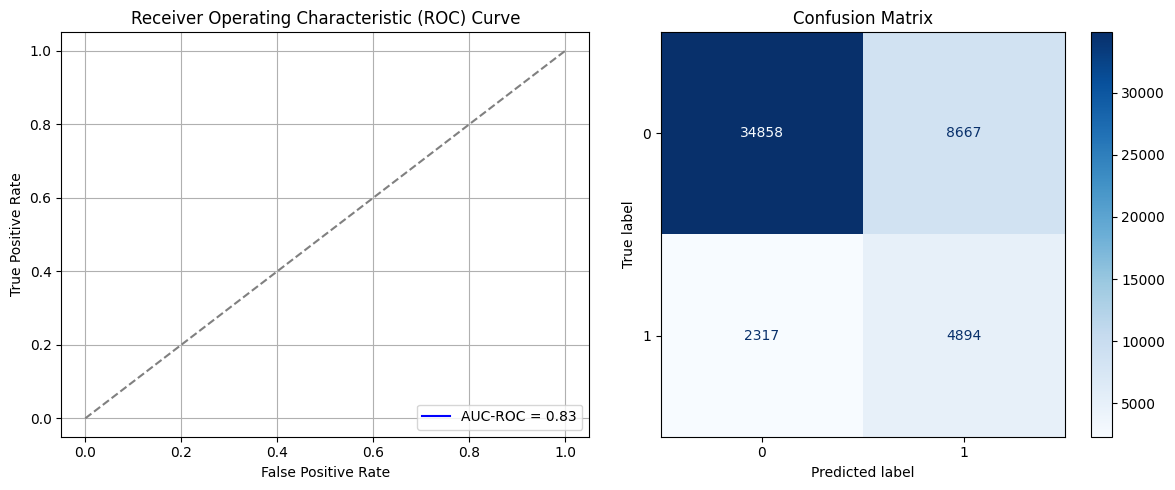

Best threshold based on F1-score: 0.5530154705047607


In [77]:
times = 1

Training_time = []
FPR = []
TPR = []
FNR = []
TNR = []
TL_time = []


for i in range(times):
    data_min_ros = data_minority.sample(n=oversample_size - undersample_size, replace=True)
    data_SRS_ROS = pd.concat([data_majority, data_min_ros, data_minority])
    X_SRS_ROS_train = data_SRS_ROS.iloc[:, :21]
    y_SRS_ROS_train = data_SRS_ROS.iloc[:, 21]
    model_SRS_ROS = create_dnn_model(X_SRS_ROS_train.shape[1])
    result_SRS_ROS = train_and_evaluate_ml(model_SRS_ROS, X_SRS_ROS_train, X_test, y_SRS_ROS_train, y_test, "Source")

    FPR.append(result_SRS_ROS[0])
    TNR.append(result_SRS_ROS[1])
    FNR.append(result_SRS_ROS[2])
    TPR.append(result_SRS_ROS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

In [78]:
print(ParamFit)
ParamFit.to_csv('ML_SRS_ROS2.csv')

        FPR       TPR       FNR       TNR
0  0.199127  0.678685  0.321315  0.800873


In [79]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.3213146581611427
StDev FNR: nan


## Systematic Resampling:

In this case, we examine the possibility of performing Random Oversampling on the minority class using systematic sampling. For this purpose, taking a sampling interval of $k$, we would compile a total of $k*\frac{N_0-N_1}{N_1}$ systematic samples from the minority class in order to balance the dataset. We sample the starting point from 1 to $k$ *with replacement*, since a highly imbalanced dataset will require sampling with replacement in order to achieve a balanced dataset.

In particular, taking $k=48$ yields a number of samples of $k*\frac{N_0-N_1}{N_1}=254.986 \approx 255$, so we take $k=48$.

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8737/8737 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - AUC: 0.8053 - loss: 0.5117 - val_AUC: 0.0000e+00 - val_loss: 0.6133
Epoch 2/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - AUC: 0.8268 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.7768
Epoch 3/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - AUC: 0.8292 - loss: 0.4858 - val_AUC: 0.0000e+00 - val_loss: 0.6690
Epoch 4/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8299 - loss: 0.4847 - val_AUC: 0.0000e+00 - val_loss: 0.6147
Epoch 5/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8309 - loss: 0.4836 - val_AUC: 0.0000e+00 - val_loss: 0.7636
Epoch 6/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.8314 - loss: 0.4826 - val_AUC: 0.0000e+00 - val_loss: 0.6376
Epoch 7/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.8320 - loss: 0.4820 - val_AUC: 0.0000e+00 - val_loss: 0.7135
Epoch 8/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.8343 - loss: 0.4797 - val_AUC: 0.0000e+00 - val_loss: 0.6504
Epoch 9/10


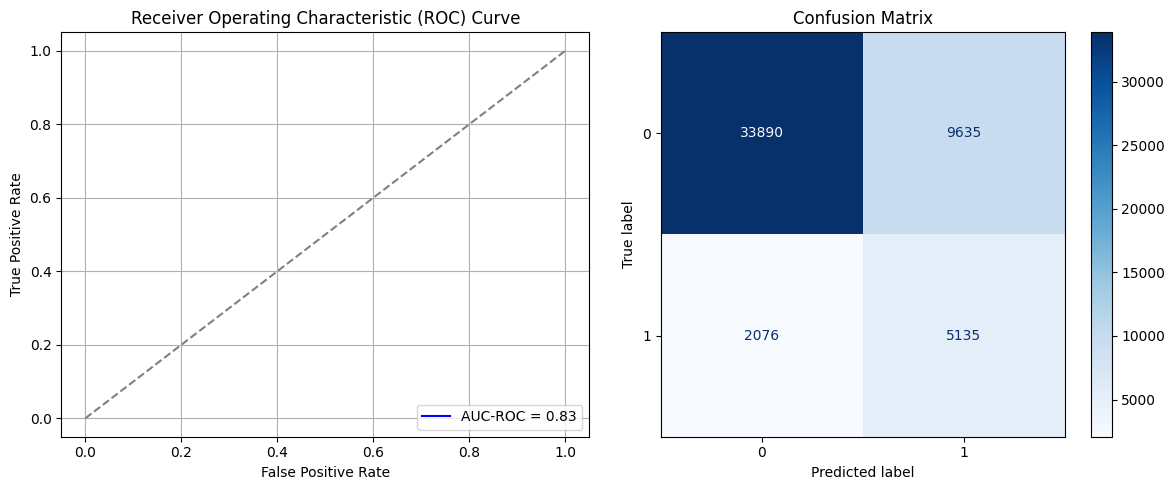

Best threshold based on F1-score: 0.5762668251991272


In [80]:
times = 1

FPR = []
TPR = []
FNR = []
TNR = []

k = 48
Nsamples = k*(oversample_size-undersample_size)/undersample_size



for i in range(times):
    start = np.random.choice(int(k), int(Nsamples), replace=True)
    Row = []
    for j in range(len(start)):
      for i in range(int(undersample_size/k)):
        row = start[j]+int(k*i)-1
        Row.append(row)
    data_min_ros = pd.DataFrame()
    data_min_ros = data_minority.iloc[Row]
    data_Sy_ROS = pd.concat([data_majority, data_min_ros, data_minority])
    X_Sy_ROS_train = data_Sy_ROS.iloc[:, :21]
    y_Sy_ROS_train = data_Sy_ROS.iloc[:, 21]
    model_Sy_ROS = create_dnn_model(X_Sy_ROS_train.shape[1])
    result_Sy_ROS = train_and_evaluate_ml(model_Sy_ROS, X_Sy_ROS_train, X_test, y_Sy_ROS_train, y_test, "Source")

    FPR.append(result_Sy_ROS[0])
    TNR.append(result_Sy_ROS[1])
    FNR.append(result_Sy_ROS[2])
    TPR.append(result_Sy_ROS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

In [81]:
print(ParamFit)
ParamFit.to_csv('ML_Sy_ROS2.csv')

        FPR       TPR       FNR       TNR
0  0.221367  0.712107  0.287893  0.778633


In [82]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.2878934960477049
StDev FNR: nan
